# Dataset simulado

## Importación y muestro

### Preparación del entorno

In [1]:
import sqlite3 as s
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")

### Importación de datos

In [2]:
# Conexión con la base de datos
conn = s.connect("dataset.db")
cursor = conn.cursor()

# Importación de los datos
df = pd.read_sql("SELECT * FROM materiales;", conn)

# Cerrar conexión con la base de datos
conn.close()

# Primeras 5 filas
df.head()

,Fecha,plastico,madera,vidrio,sargazo
0,2019-01-01,159.93,99.46,206.50,156.82
1,2019-02-01,147.23,123.47,219.55,172.90
2,2019-03-01,162.95,60.70,169.08,165.44
3,2019-04-01,180.46,112.33,166.99,182.46
4,2019-05-01,145.32,101.31,213.05,249.44


In [3]:
# Cambiar tipo de datos "Fecha" de 'object' a 'datetime'
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Transformar la variable a índice
df.set_index("Fecha", inplace=True)

# Primeras 5 filas
df.head()

,plastico,madera,vidrio,sargazo
Fecha,,,,
2019-01-01,159.93,99.46,206.50,156.82
2019-02-01,147.23,123.47,219.55,172.90
2019-03-01,162.95,60.70,169.08,165.44
2019-04-01,180.46,112.33,166.99,182.46
2019-05-01,145.32,101.31,213.05,249.44


### Muestreo

In [4]:
# Dimensiones del dataset
df.shape

(72, 4)

In [5]:
# Tipo de dato del índice confirmado
df.index.dtype

dtype('<M8[ns]')

In [6]:
# Fechas del índice (frecuencia="BMS")
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
      

## Calidad de datos

### Exploración general

In [7]:
# Nombres de las columnas
df.columns

Index(['plastico', 'madera', 'vidrio', 'sargazo'], dtype='object')

In [8]:
# Primeras 5 filas
df.head()

,plastico,madera,vidrio,sargazo
Fecha,,,,
2019-01-01,159.93,99.46,206.50,156.82
2019-02-01,147.23,123.47,219.55,172.90
2019-03-01,162.95,60.70,169.08,165.44
2019-04-01,180.46,112.33,166.99,182.46
2019-05-01,145.32,101.31,213.05,249.44


In [9]:
# Últimas 5 filas
df.tail()

,plastico,madera,vidrio,sargazo
Fecha,,,,
2024-08-01,170.07,81.54,228.39,142.87
2024-09-01,157.23,103.41,223.85,243.99
2024-10-01,137.10,119.61,216.28,121.44
2024-11-01,157.23,75.89,192.12,175.45
2024-12-01,180.76,102.77,218.97,197.65


### Tipos de datos y datos nulos

In [10]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2019-01-01 to 2024-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   plastico  72 non-null     float64
 1   madera    72 non-null     float64
 2   vidrio    72 non-null     float64
 3   sargazo   72 non-null     float64
dtypes: float64(4)
memory usage: 2.8 KB


### Estadísticos básicos

In [11]:
# Estadísticas básicas del dataset
df.describe()

,plastico,madera,vidrio,sargazo
count,72.000000,72.000000,72.000000,72.000000
mean,147.908333,99.141389,204.649306,178.044722
std,18.203453,14.805608,24.117731,32.986714
min,110.810000,60.700000,162.130000,90.000000
25%,136.940000,91.000000,182.785000,157.772500
50%,146.760000,99.540000,207.375000,177.385000
75%,160.160000,106.320000,216.770000,199.992500
max,187.050000,136.950000,296.320000,249.440000


### Atípicos

#### Distribución de los datos

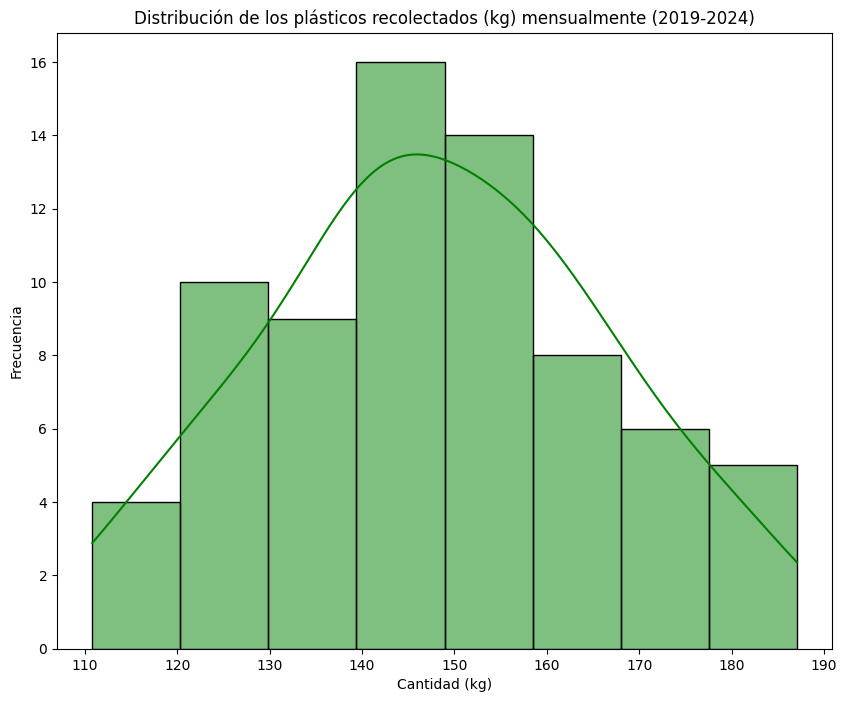

In [12]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="plastico", kde=True, color="green")
plt.title("Distribución de los plásticos recolectados (kg) mensualmente (2019-2024)")
plt.xlabel("Cantidad (kg)")
plt.ylabel("Frecuencia")
plt.show()

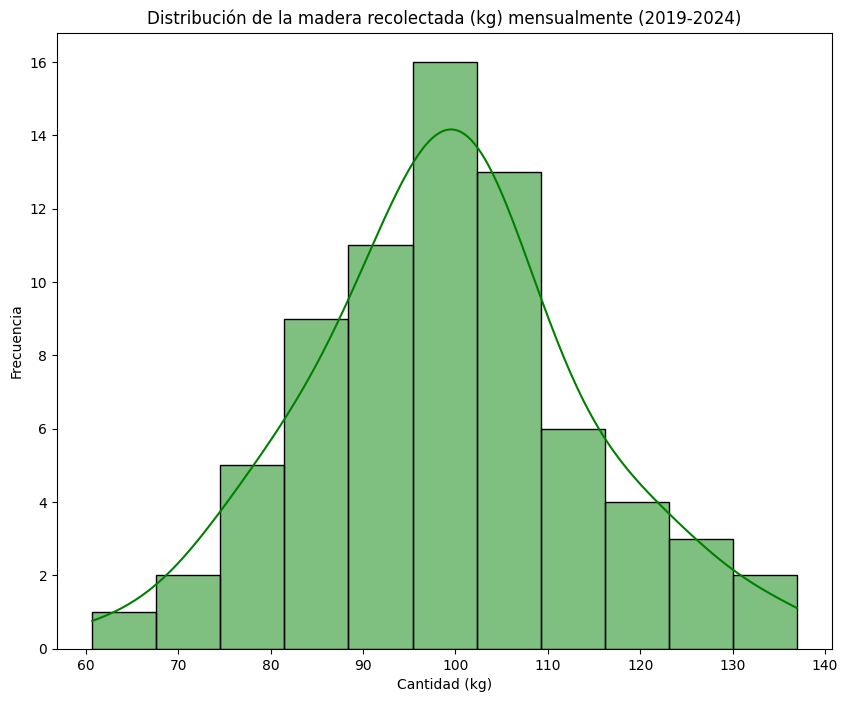

In [13]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="madera", kde=True, color="green")
plt.title("Distribución de la madera recolectada (kg) mensualmente (2019-2024)")
plt.xlabel("Cantidad (kg)")
plt.ylabel("Frecuencia")
plt.show()

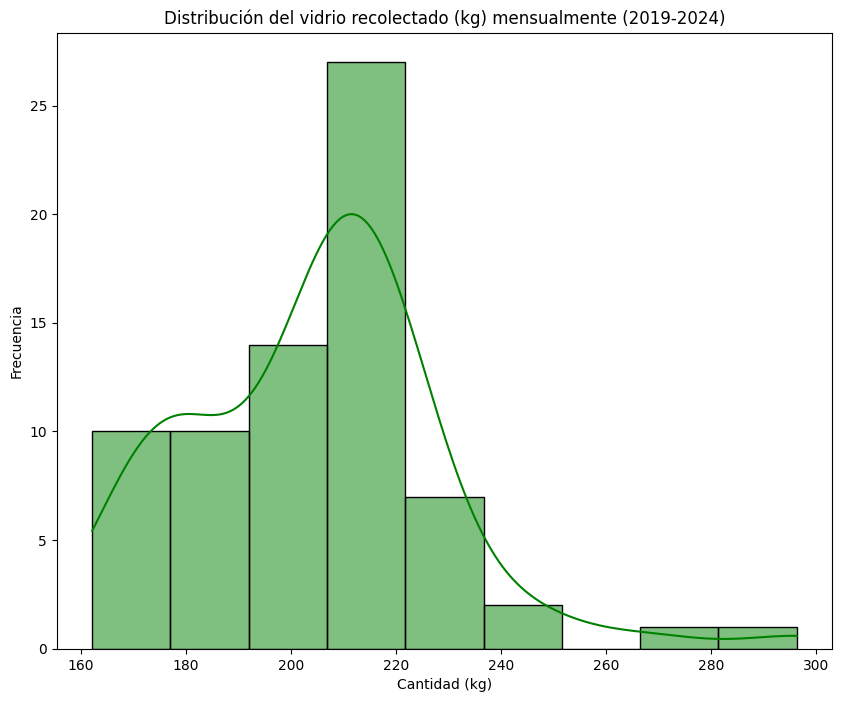

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="vidrio", kde=True, color="green")
plt.title("Distribución del vidrio recolectado (kg) mensualmente (2019-2024)")
plt.xlabel("Cantidad (kg)")
plt.ylabel("Frecuencia")
plt.show()

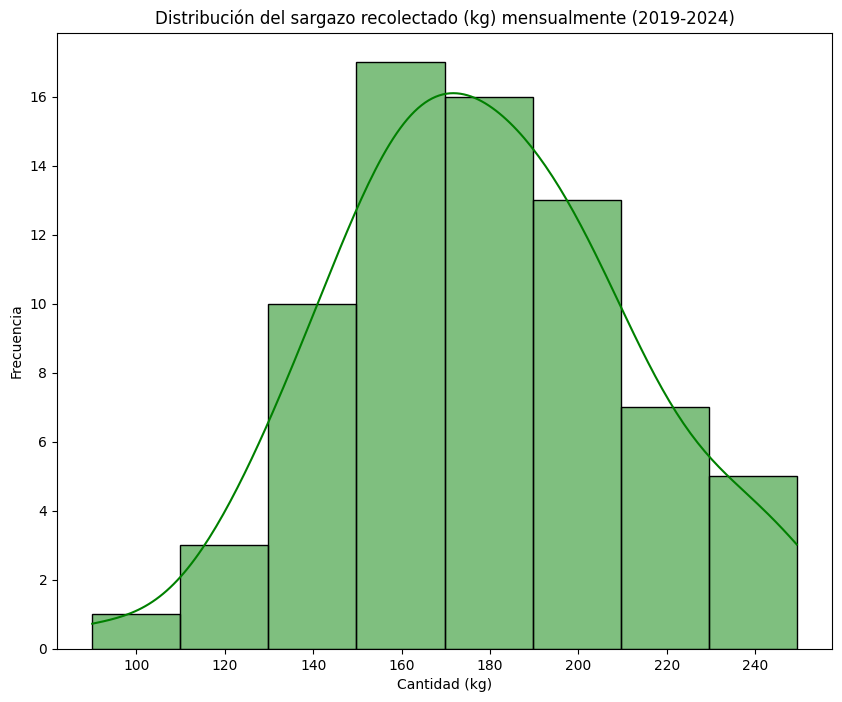

In [15]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="sargazo", kde=True, color="green")
plt.title("Distribución del sargazo recolectado (kg) mensualmente (2019-2024)")
plt.xlabel("Cantidad (kg)")
plt.ylabel("Frecuencia")
plt.show()

#### Tendencia de materiales usados

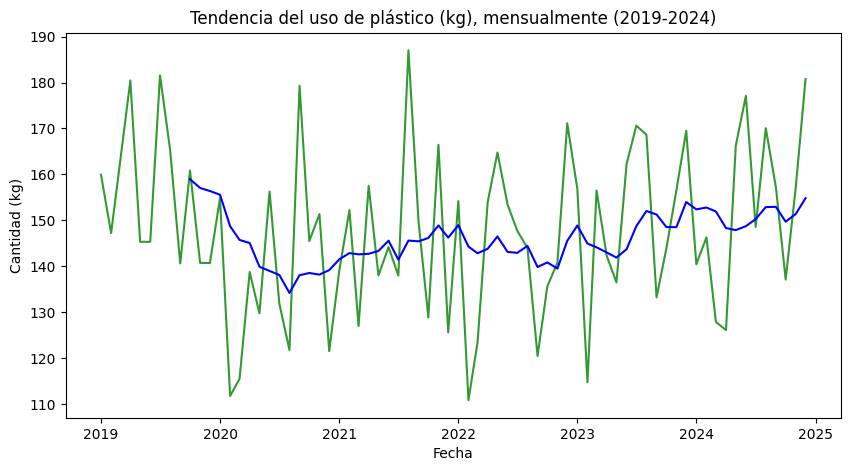

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df["plastico"], color="green", alpha=0.8)
plt.plot(df["plastico"].rolling(window=10).mean(), color="blue")
plt.title("Tendencia del uso de plástico (kg), mensualmente (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.show()

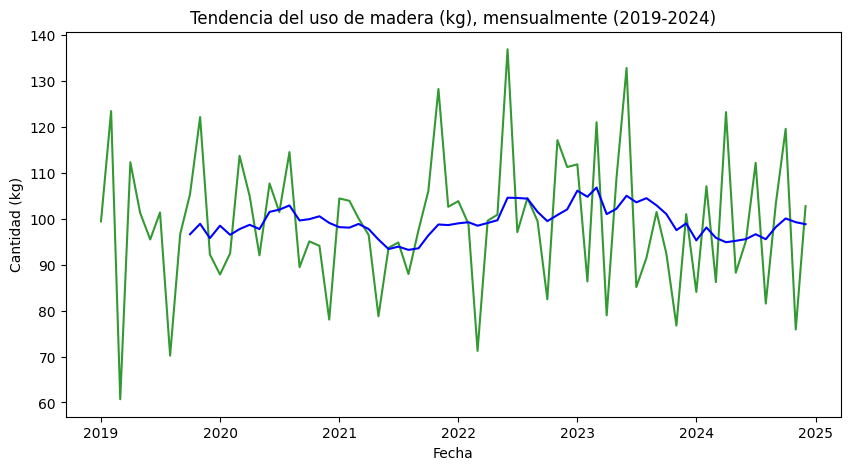

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df["madera"], color="green", alpha=0.8)
plt.plot(df["madera"].rolling(window=10).mean(), color="blue")
plt.title("Tendencia del uso de madera (kg), mensualmente (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.show()

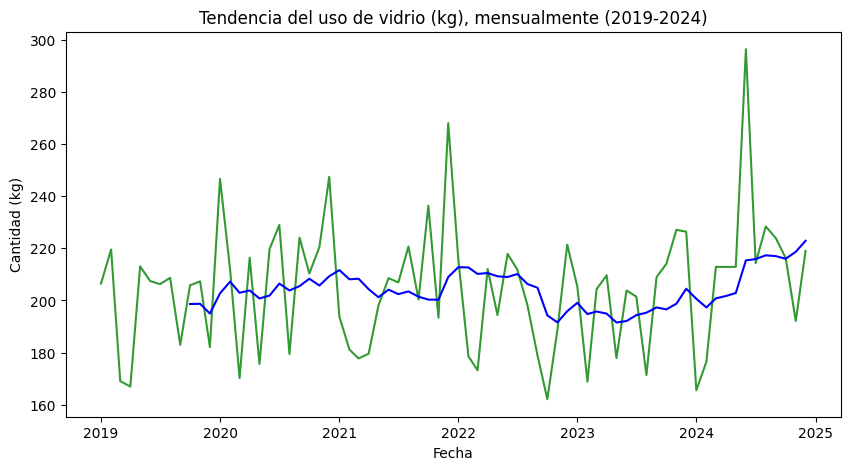

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df["vidrio"], color="green", alpha=0.8)
plt.plot(df["vidrio"].rolling(window=10).mean(), color="blue")
plt.title("Tendencia del uso de vidrio (kg), mensualmente (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.show()

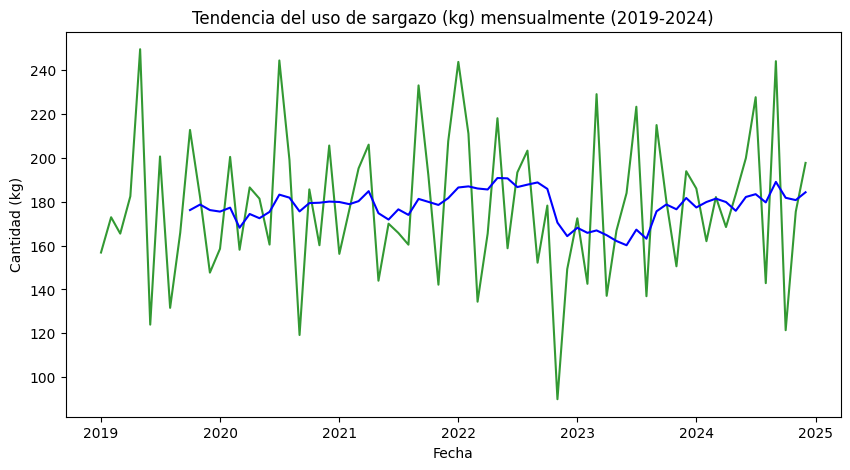

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df["sargazo"], color="green", alpha=0.8)
plt.plot(df["sargazo"].rolling(window=10).mean(), color="blue")
plt.title("Tendencia del uso de sargazo (kg) mensualmente (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.show()

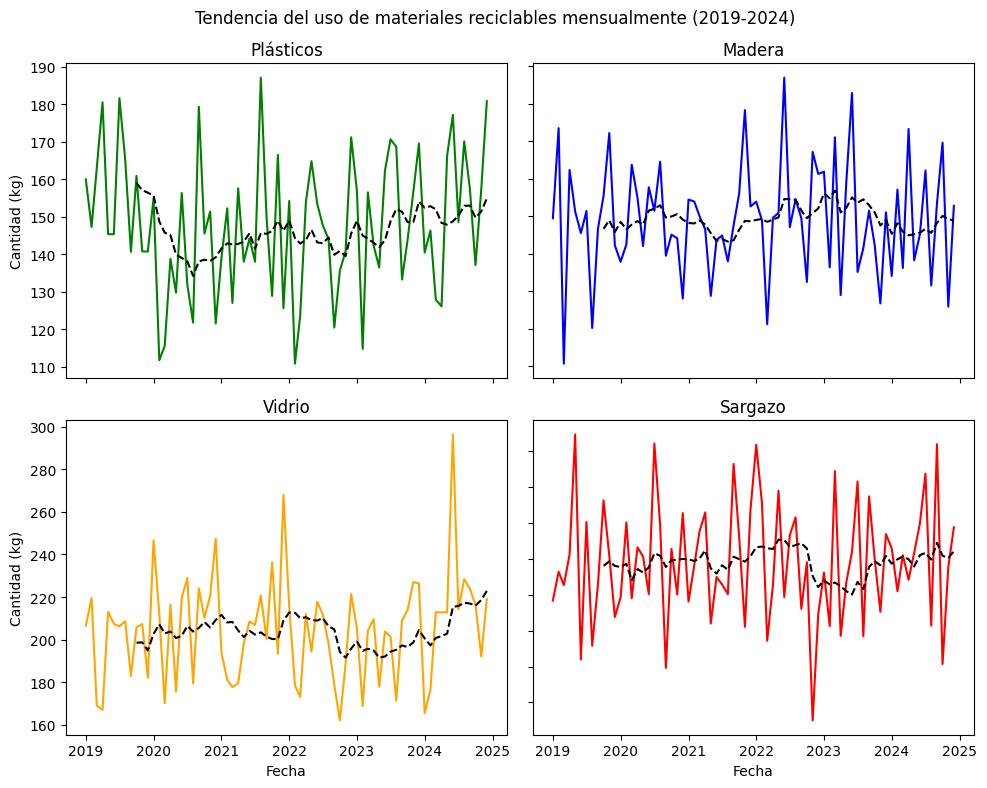

In [20]:
# Configurando el lienzo
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de los plásticos
axs[0, 0].set_title("Plásticos")
axs[0, 0].plot(df["plastico"], color="green")
axs[0, 0].plot(df["plastico"].rolling(window=10).mean(), color="black", linestyle="--")

# Gráfico de la madera
axs[0, 1].set_title("Madera")
axs[0, 1].plot(df["madera"], color="blue")
axs[0, 1].plot(df["madera"].rolling(window=10).mean(), color="black", linestyle="--")

# Gráfico del vidrio
axs[1, 0].set_title("Vidrio")
axs[1, 0].plot(df["vidrio"], color="orange")
axs[1, 0].plot(df["vidrio"].rolling(window=10).mean(), color="black", linestyle="--")

# Gráfico del sargazo
axs[1, 1].set_title("Sargazo")
axs[1, 1].plot(df["sargazo"], color="red")
axs[1, 1].plot(df["sargazo"].rolling(window=10).mean(), color="black", linestyle="--")

# Título principal
fig.suptitle("Tendencia del uso de materiales reciclables mensualmente (2019-2024)")

# Agregando labels a cada gráfico
for ax in axs.flat:
    ax.set(xlabel="Fecha", ylabel="Cantidad (kg)")

# Acomodando los labels
for ax in axs.flat:
    ax.label_outer()

# Impresión de los gráficos
plt.tight_layout()
plt.show()

## Transformación de datos

### Variable target

In [21]:
# Variable total que servirá para predecir demanda
total = np.array(df["plastico"] + df["madera"] + df["vidrio"] + df["sargazo"])

# Integración de las fechas al total de materiales (por kg)
total = pd.Series(data=total, index=df.index)

# Serie de tiempo
total

Fecha
2019-01-01    622.71
2019-02-01    663.15
2019-03-01    558.17
2019-04-01    642.24
2019-05-01    709.12
               ...  
2024-08-01    622.87
2024-09-01    728.48
2024-10-01    594.43
2024-11-01    600.69
2024-12-01    700.15
Length: 72, dtype: float64

### Variables sintéticas

In [22]:
print("Estadísticos básicos del total de materiales\n")
print(f"Cantidad de observaciones: {len(total)}\n")
print(f"Promedio de observaciones: {total.mean():.2f}\n")
print(f"Desviación estandar del total: {total.std():.2f}\n")
print(f"Valor mínimo en total: {total.min():.2f}\n")
print(f"Percentil 25 en el total: {np.percentile(a=total, q=25):.2f}\n")
print(f"Percentil 50 en el total: {np.percentile(a=total, q=50):.2f}\n")
print(f"Percentil 75 en el total: {np.percentile(a=total, q=75):.2f}\n")
print(f"Máximo del total de materiales: {total.max():.2f}\n")

Estadísticos básicos del total de materiales

Cantidad de observaciones: 72

Promedio de observaciones: 629.74

Desviación estandar del total: 53.47

Valor mínimo en total: 502.31

Percentil 25 en el total: 593.21

Percentil 50 en el total: 630.60

Percentil 75 en el total: 663.21

Máximo del total de materiales: 768.47



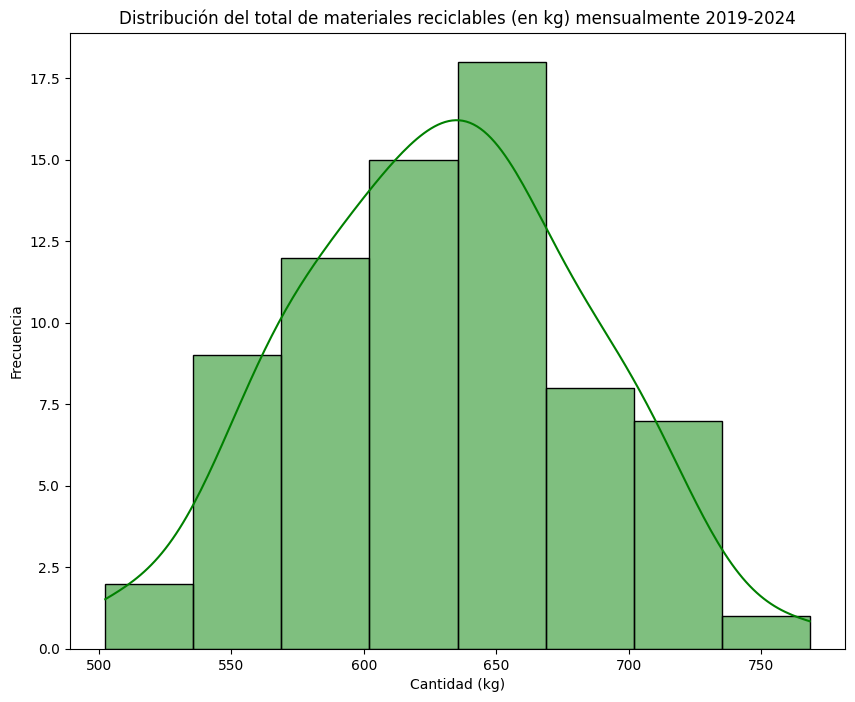

In [23]:
plt.figure(figsize=(10, 8))
sns.histplot(data=total, kde=True, color="green")
plt.title("Distribución del total de materiales reciclables (en kg) mensualmente 2019-2024")
plt.xlabel("Cantidad (kg)")
plt.ylabel("Frecuencia")
plt.show()

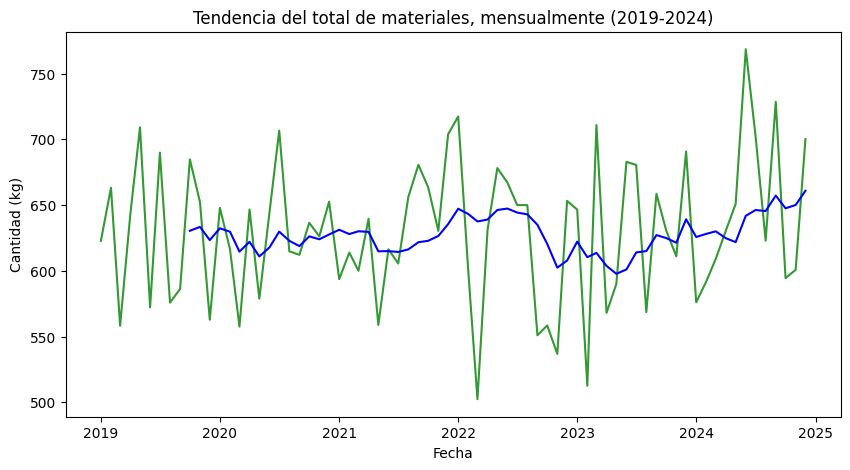

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(total, color="green", alpha=0.8)
plt.plot(total.rolling(window=10).mean(), color="blue")
plt.title("Tendencia del total de materiales, mensualmente (2019-2024)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.show()

### Análisis de series temporales

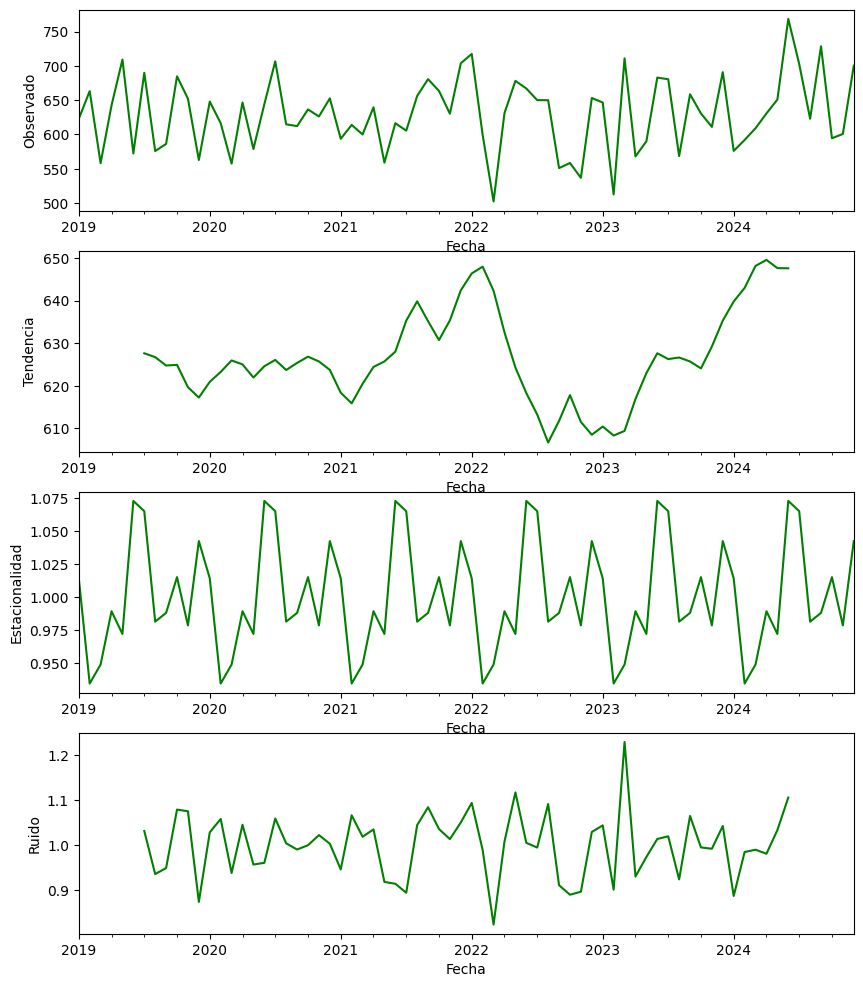

In [25]:
# Descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(total, model="multiplicative")

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))
sd.observed.plot(ax=ax1, legend=False, color="green")
ax1.set_ylabel("Observado")
sd.trend.plot(ax=ax2, legend=False, color="green")
ax2.set_ylabel("Tendencia")
sd.seasonal.plot(ax=ax3, legend=False, color="green")
ax3.set_ylabel("Estacionalidad")
sd.resid.plot(ax=ax4, legend=False, color="green")
ax4.set_ylabel("Ruido")
plt.show()

In [26]:
# Prueba de la desviación estandar de los residuos
print(f"Desviación estandar: {total.std():.2f}")
print(f"Desviación estandar de la descomposición: {sd.resid.std():.2f}")
if sd.resid.std() < total.std():
    print("Los residuos se pueden explicar")
else:
    print("Los residuos son dificiles de explicar")

Desviación estandar: 53.47
Desviación estandar de la descomposición: 0.07
Los residuos se pueden explicar


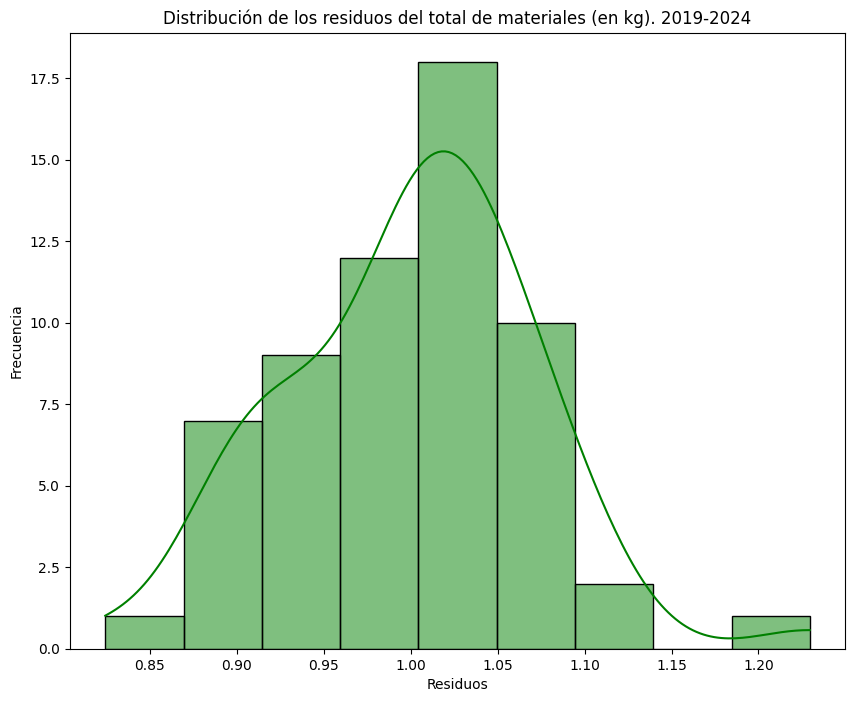

In [27]:
plt.figure(figsize=(10, 8))
sns.histplot(sd.resid, kde=True, color="green")
plt.title("Distribución de los residuos del total de materiales (en kg). 2019-2024")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

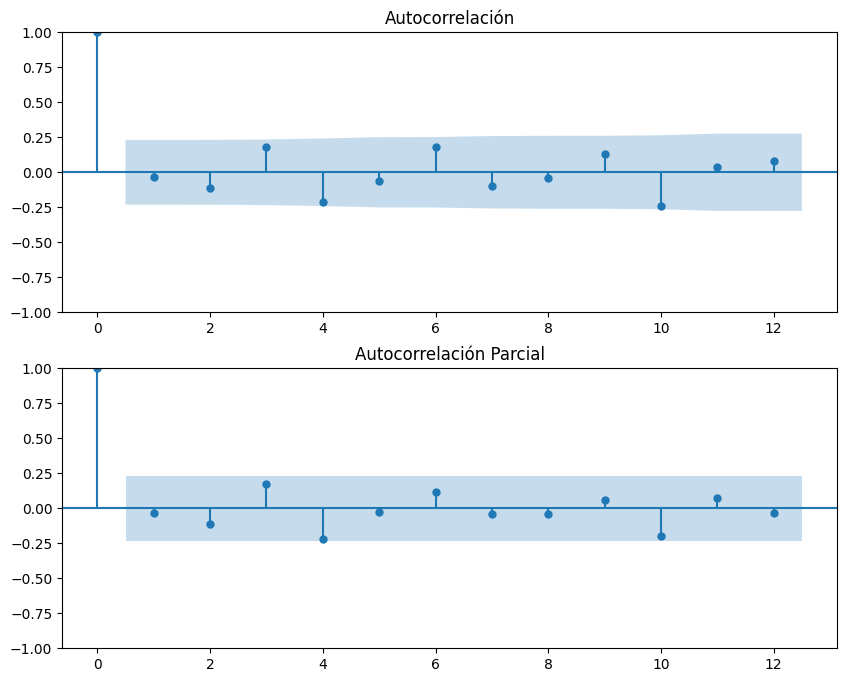

In [28]:
# Función de autocorrelación y función de autocorrelación parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(total, lags=12, ax=ax1, title="Autocorrelación")
plot_pacf(total, lags=12, ax=ax2, title="Autocorrelación Parcial")
plt.show()

In [29]:
# Prueba de Dickey-Fuller para estacionariedad
from statsmodels.tsa.stattools import adfuller

result = adfuller(total)
print("Estadístico ADF:", result[0])
print("Valor p:", result[1])
for key, value in result[4].items():
    print(f"Valor crítico {key}: {value}")

Estadístico ADF: -8.523003311999137
Valor p: 1.0878456963159295e-13
Valor crítico 1%: -3.526004646825607
Valor crítico 5%: -2.9032002348069774
Valor crítico 10%: -2.5889948363419957


**Análisis:**

El p valor es menor que 0.05, por lo tanto la serie estacionaria. La serie es estacionaria en un 99% de confianza (esto es debido a que el valor crítico 1% es mayor que el estadístico ADF).

## Modelización

### Train y test

In [30]:
# Creando el tamaño de los datos de entrenamiento
train_size = int(len(total) * 0.8)
df.iloc[train_size]

plastico    143.82
madera       92.45
vidrio      214.02
sargazo     180.31
Name: 2023-10-01 00:00:00, dtype: float64

In [31]:
# Creación de datos de entrenamiento y de prueba
train, test = total.iloc[:58], total.iloc[57:]
print("Datos de entrenamiento:\n", train)

Datos de entrenamiento:
 Fecha
2019-01-01    622.71
2019-02-01    663.15
2019-03-01    558.17
2019-04-01    642.24
2019-05-01    709.12
2019-06-01    572.23
2019-07-01    689.81
2019-08-01    575.82
2019-09-01    586.15
2019-10-01    684.69
2019-11-01    652.16
2019-12-01    562.73
2020-01-01    647.89
2020-02-01    616.44
2020-03-01    557.54
2020-04-01    646.58
2020-05-01    578.79
2020-06-01    644.11
2020-07-01    706.58
2020-08-01    614.78
2020-09-01    612.11
2020-10-01    636.48
2020-11-01    626.17
2020-12-01    652.55
2021-01-01    593.64
2021-02-01    613.86
2021-03-01    599.97
2021-04-01    639.56
2021-05-01    558.82
2021-06-01    616.35
2021-07-01    605.50
2021-08-01    656.10
2021-09-01    680.60
2021-10-01    663.40
2021-11-01    630.29
2021-12-01    703.74
2022-01-01    717.34
2022-02-01    599.23
2022-03-01    502.31
2022-04-01    631.07
2022-05-01    678.09
2022-06-01    667.00
2022-07-01    649.94
2022-08-01    649.92
2022-09-01    550.93
2022-10-01    558.41
202

In [32]:
print("Datos de prueba:\n", test)

Datos de prueba:
 Fecha
2023-10-01    630.60
2023-11-01    611.00
2023-12-01    690.75
2024-01-01    576.02
2024-02-01    591.93
2024-03-01    609.05
2024-04-01    630.61
2024-05-01    650.79
2024-06-01    768.47
2024-07-01    702.61
2024-08-01    622.87
2024-09-01    728.48
2024-10-01    594.43
2024-11-01    600.69
2024-12-01    700.15
dtype: float64


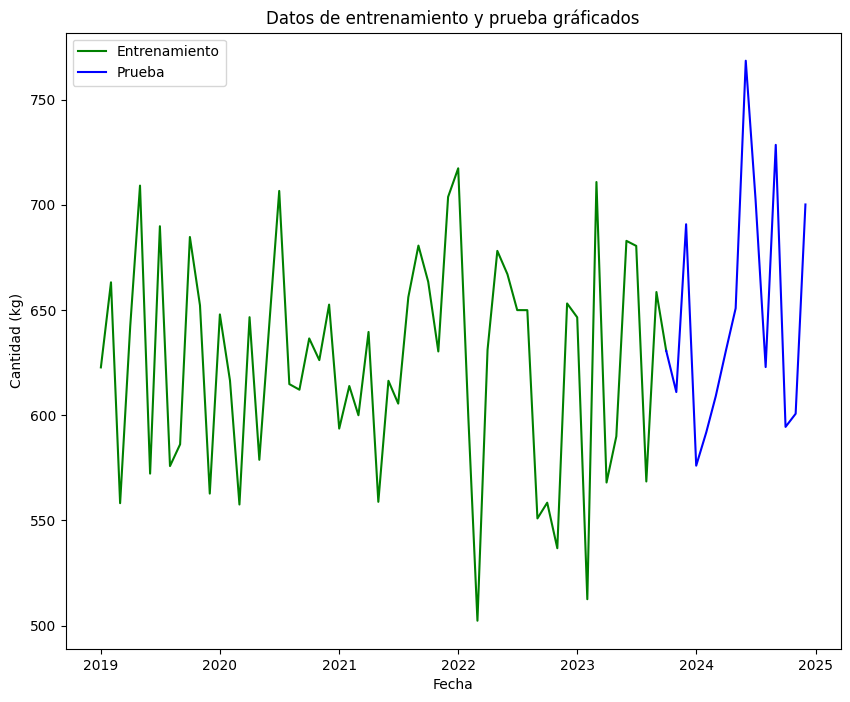

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(train, label="Entrenamiento", color="green")
plt.plot(test, label="Prueba", color="blue")
plt.title("Datos de entrenamiento y prueba gráficados")
plt.xlabel("Fecha")
plt.ylabel("Cantidad (kg)")
plt.legend()
plt.show()

### Funciones de apoyo

In [34]:
# Obtención de todos los valores de los parámetros
p = q = range(0, 6)
d = range(0, 3)

# Declaración de todos los valores de los parámetros
pdq = [(x, y, z) for x in p for y in d for z in q]

In [35]:
# Método de Grid Search para escoger los mejores parámetros
best_aic = np.inf
best_params = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = param
    except:
        continue

print(f"El mejor conjunto de parámetros es {best_params} con un AIC de {best_aic:.2f}")

El mejor conjunto de parámetros es (2, 1, 3) con un AIC de 618.04


### Modelo ARIMA

In [36]:
# Creación del modelo ARIMA con los mejores parámetros
model = ARIMA(train, order=best_params)
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

In [37]:
# Creación del nivel de confianza
confidence = model_fit.get_forecast(steps=len(test))
conf_int = confidence.conf_int()

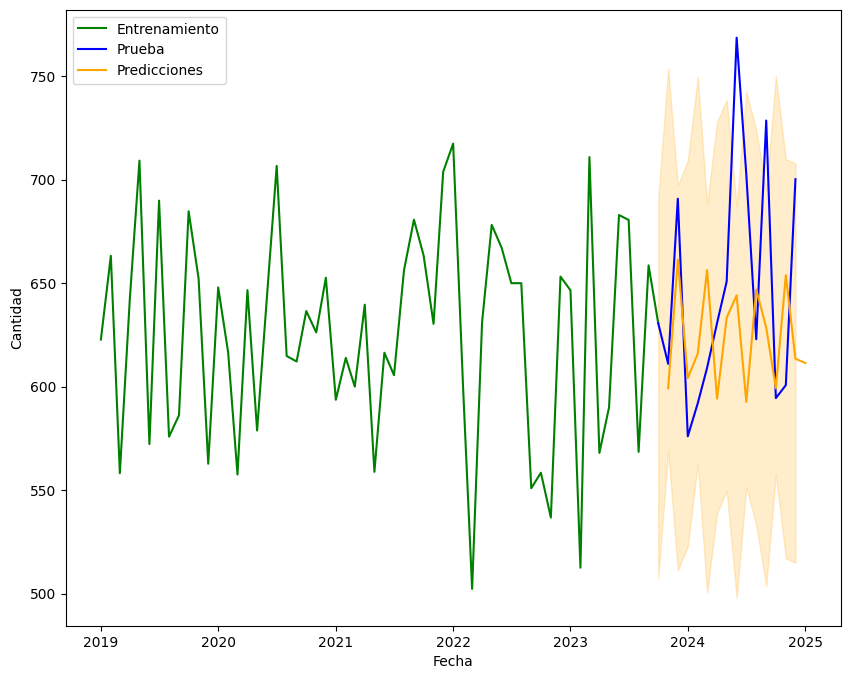

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(train, label="Entrenamiento", color="green")
plt.plot(test, label="Prueba", color="blue")
plt.plot(predictions, label="Predicciones", color="orange")
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="orange", alpha=0.2)
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

## Evaluación

In [39]:
# Evaluar el desempeño del modelo
mae = mean_squared_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predictions)/test)) * 100
r2 = r2_score(test, predictions)

# Imprimir resultados
print(f"Error absoluto medio: {mae:.2f}")
print(f"Error cuadrático medio: {mse:.2f}")
print(f"Raíz del error cuadrático medio: {rmse:.2f}")
print(f"Porcentaje del error absoluto medio: {mape:.2f}")
print(f"R cuadrado: {r2:.2f}")

Error absoluto medio: 5290.98
Error cuadrático medio: 5290.98
Raíz del error cuadrático medio: 72.74
Porcentaje del error absoluto medio: 7.34
R cuadrado: -0.72
